# Data description:

This data set has records of 1000 client. It has 17 categorical independant variables, 3 continuous variables, and 1 binomial target variable. Target variable is "Has the credit contract been complied with (good, 1) or not (bad, 0)?"

In [1]:
from sandbox_functions import create_data, create_balanced_sample, assign_categorical_levels, verify_sample_belongs_to_population, standardize_continuous_variables, remove_outliers, principal_components_analysis, get_representative_vars_by_pca, plot_cummulated_variance_from_pca, split_data_into_test_and_train, implement_decision_tree, evaluate_performance_of_decision_tree

credit_data = create_data()

Data has been created, regarding categorical values as original categories. Numbers have been replaced with strings in order to work with categories. Further, the colnames where replaced with english translation. This data has a shape of 1000 rows and 21 columns. And it has oversampling of good credits (700) against bad credits (300).

<AxesSubplot:>

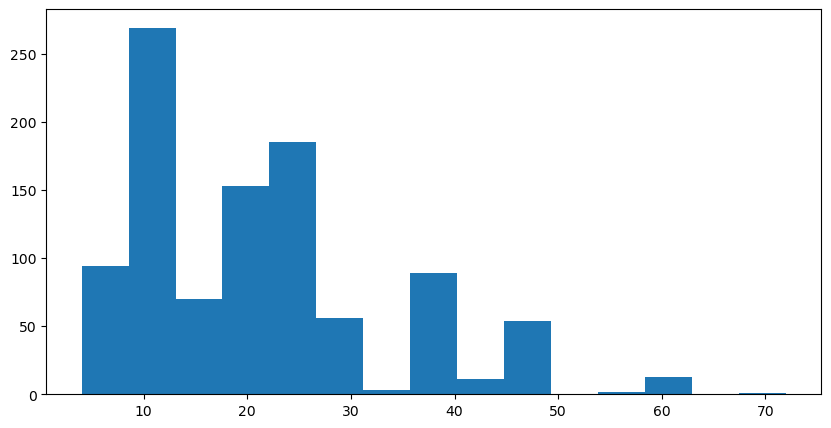

In [2]:
credit_data.duration.hist(figsize=(10, 5), grid=False, bins=15)

<AxesSubplot:>

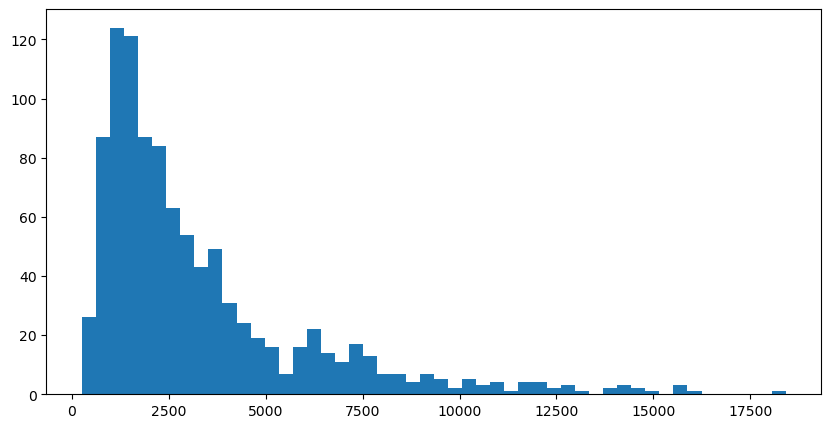

In [3]:
credit_data.amount.hist(figsize=(10, 5), grid=False, bins=50)

<AxesSubplot:>

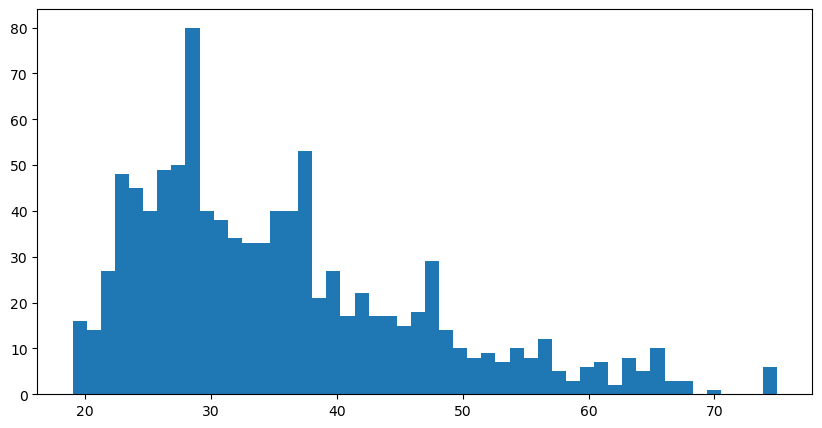

In [4]:
credit_data.age.hist(figsize=(10, 5), grid=False, bins=50)

The histograms showed distributions skewed to the left, it is visible that they have data out of range, which is yet to determine the best treatment, since they could indicate something by themselves. Although for practical purposes they should simply be removed from the preliminary analysis. Meanwhile lets create a balanced subset and standarize those continuous variables in order to do a PCA and regard only those variables that better describe our data.

In [5]:
credit_data = standardize_continuous_variables(credit_data, ['duration', 'amount', 'age'])
credit_data_no, credit_data_ol = remove_outliers(credit_data, ['duration', 'amount', 'age'])

In [6]:
credit_data_no.credit_risk.value_counts()

1    634
0    228
Name: credit_risk, dtype: int64

In [7]:
df_pca_result, pca = principal_components_analysis(credit_data_no)
representative_columns = get_representative_vars_by_pca(credit_data_no, pca)

print(f'Variables that most accurately account for the variation: {representative_columns}')
print(len(representative_columns))

Variables that most accurately account for the variation: Index(['purpose', 'installment_rate', 'status', 'present_residence',
       'other_installment_plans', 'employment_duration', 'duration',
       'credit_history', 'number_credits', 'telephone', 'housing',
       'foreign_worker', 'amount', 'personal_status_sex', 'other_debtors',
       'credit_risk', 'property', 'people_liable', 'age', 'job', 'savings'],
      dtype='object')
21



The categorical variables that best explain the variance are 'installment_rate' and 'property', so the strata will be based on these properties, in such a way that the greatest variance is what directs the stratification

Para investigar: ¿Cuánta varianza se está explicando con estas variables? ¿Se debería aumentar? ¿Podría tener algo qué ver el P-value?

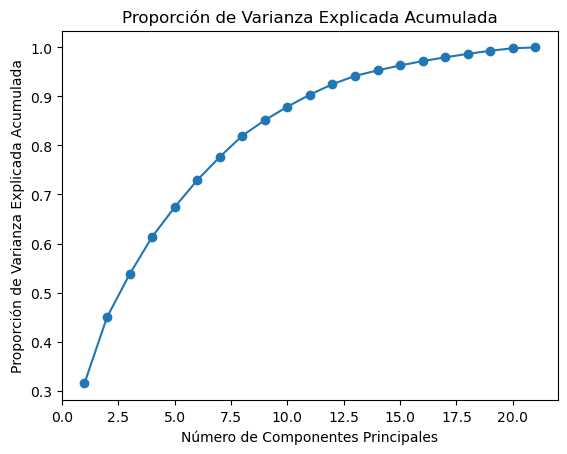

In [8]:
plot_cummulated_variance_from_pca(pca.explained_variance_ratio_)

This plot suggest that the optimal components are 15, at that point variance decrease its increasing ratio.

In [9]:
subsampling_features = [
  'purpose',
  'installment_rate',
  'status',
  'present_residence',
  'other_installment_plans',
  'employment_duration',
  'credit_history',
  'number_credits',
  'telephone',
  'housing',
  'foreign_worker',
  'personal_status_sex',
  'other_debtors',
  'property',
]
subsample = create_balanced_sample(credit_data_no, subsampling_features, 500)
subsample = assign_categorical_levels(subsample)
subsample.credit_risk.value_counts()

# TO-DO: fix 'create_balanced_sample' function to avoid extra or missing records.
# Idea: add extra random sampling when sample size is lower than setted in the function

1    500
0    500
Name: credit_risk, dtype: int64

In [10]:
t_statistic, p_value = verify_sample_belongs_to_population(credit_data_no[['duration', 'amount', 'age']], subsample[['duration', 'amount', 'age']])
p_value

array([0.13718136, 0.56231229, 0.06014517])

It can be seen that the sample obtained still has a significant probability of belonging to the original sample.

In [11]:
subsample.describe()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1.632000,-0.182201,2.628000,4.8040,-0.277850,3.087000,1.524000,1.54900,1.597000,1.877000,...,1.408000,-0.152379,0.925000,1.434000,0.34200,1.438000,0.179000,0.301000,0.032000,0.50000
std,1.207491,0.699334,1.720633,2.3326,0.571720,1.427399,1.313449,0.92653,1.400912,0.433658,...,1.228432,0.877966,0.455612,0.867408,0.53789,0.961811,0.383544,0.458922,0.176088,0.50025
min,0.000000,-1.402415,0.000000,0.0000,-1.070856,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,-1.457831,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.000000,-0.738668,0.750000,2.0000,-0.705072,2.000000,0.000000,1.00000,0.000000,2.000000,...,0.000000,-0.840928,1.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,-0.240857,4.000000,5.0000,-0.444104,4.000000,2.000000,2.00000,2.000000,2.000000,...,1.000000,-0.337326,1.000000,2.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.50000
75%,3.000000,0.256953,4.000000,6.0000,0.023322,4.000000,3.000000,2.00000,3.000000,2.000000,...,3.000000,0.304750,1.000000,2.000000,1.00000,3.000000,0.000000,1.000000,0.000000,1.00000
max,3.000000,1.750384,4.000000,10.0000,1.634242,4.000000,4.000000,3.00000,3.000000,2.000000,...,3.000000,2.507977,2.000000,2.000000,3.00000,3.000000,1.000000,1.000000,1.000000,1.00000


In [12]:
x_train, x_test, y_train, y_test = split_data_into_test_and_train(subsample, representative_columns[:10], 'credit_risk')

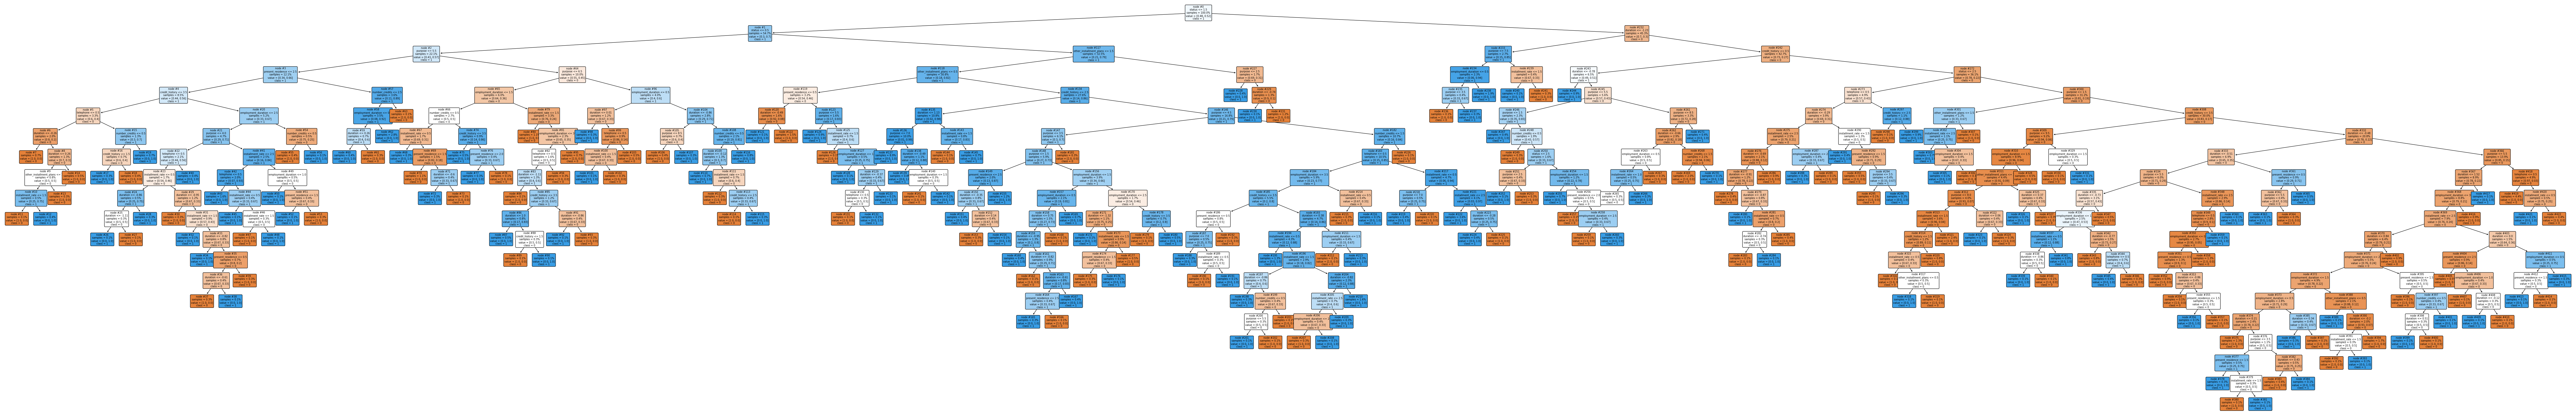

In [13]:
clf = implement_decision_tree(x_train, y_train, (25, 20), 7, left=4, right=8)

In [14]:
evaluate_performance_of_decision_tree(clf, x_test, y_test)

Precisión del árbol de decisión: 0.74
Matriz de confusión:
[[95 44]
 [20 91]]
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.83      0.68      0.75       139
           1       0.67      0.82      0.74       111

    accuracy                           0.74       250
   macro avg       0.75      0.75      0.74       250
weighted avg       0.76      0.74      0.74       250

